Saving image.png to image (4).png


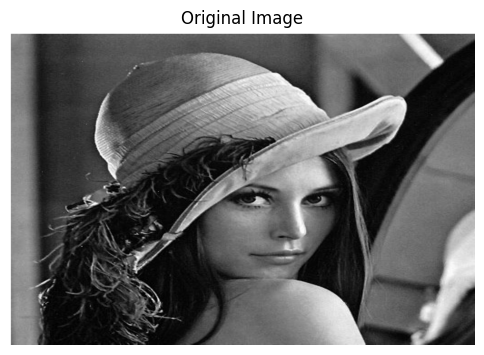

Image Size (Height, Width, Channels): (700, 1041, 3)
Total Pixels: 728700


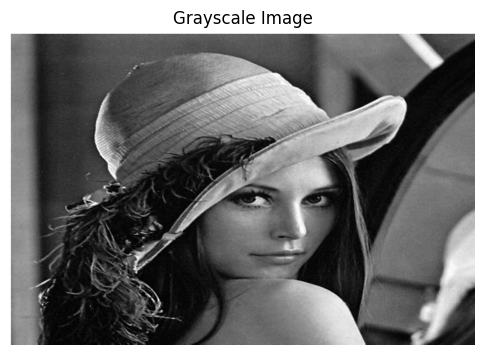

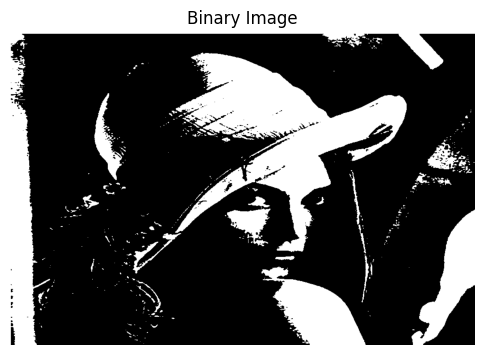

Black Pixel Count: 554504


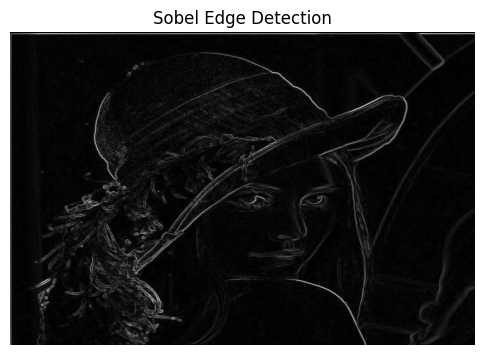

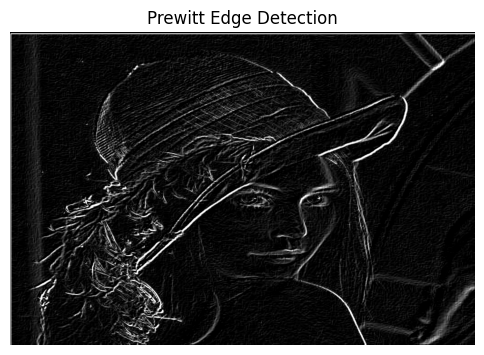

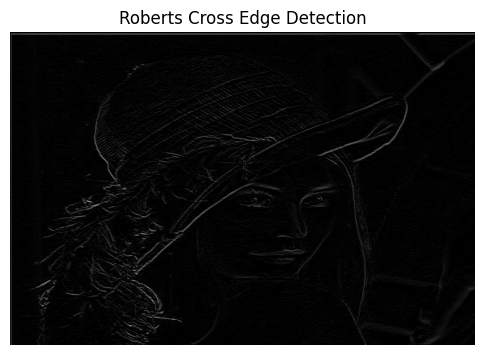

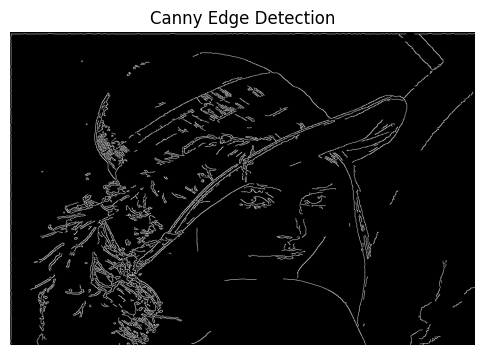

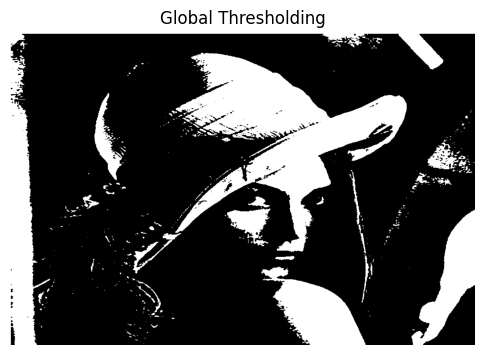

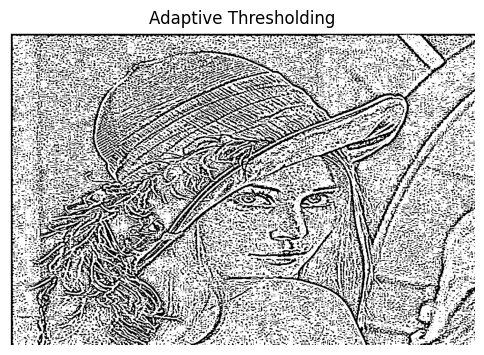

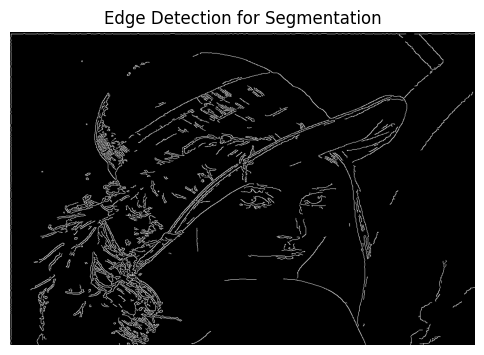

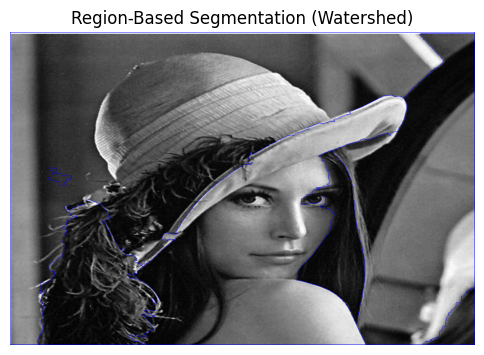

In [5]:
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()
image_path = next(iter(uploaded))
image = cv2.imdecode(np.frombuffer(uploaded[image_path], np.uint8), cv2.IMREAD_COLOR)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

#Extract Image Size & Pixels**
image_size = image.shape
total_pixels = image_size[0] * image_size[1]
print(f"Image Size (Height, Width, Channels): {image_size}")
print(f"Total Pixels: {total_pixels}")

# Convert RGB (BGR in OpenCV) to Grayscale**
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6,6))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Convert Grayscale to Binary using a threshold**
threshold = 128
_, binary_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image")
plt.axis("off")
plt.show()

# Count black pixels
black_pixel_count = np.sum(binary_image == 0)
print(f"Black Pixel Count: {black_pixel_count}")

## i. Sobel Operator
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.figure(figsize=(6,6))
plt.imshow(sobel_edge, cmap="gray")
plt.title("Sobel Edge Detection")
plt.axis("off")
plt.show()

## ii. Prewitt Operator
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx)
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt_edge = cv2.add(prewitt_x, prewitt_y)
plt.figure(figsize=(6,6))
plt.imshow(prewitt_edge, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
plt.show()

## iii. Roberts Cross Operator
roberts_kernelx = np.array([[1, 0], [0, -1]])
roberts_kernely = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, roberts_kernelx)
roberts_y = cv2.filter2D(gray_image, -1, roberts_kernely)
roberts_edge = cv2.add(roberts_x, roberts_y)
plt.figure(figsize=(6,6))
plt.imshow(roberts_edge, cmap="gray")
plt.title("Roberts Cross Edge Detection")
plt.axis("off")
plt.show()

## iv. Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)
plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

## i. Global Thresholding
_, global_thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(6,6))
plt.imshow(global_thresh, cmap="gray")
plt.title("Global Thresholding")
plt.axis("off")
plt.show()

## ii. Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(
    gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
plt.figure(figsize=(6,6))
plt.imshow(adaptive_thresh, cmap="gray")
plt.title("Adaptive Thresholding")
plt.axis("off")
plt.show()

## iii. Edge Detection for Segmentation (Canny Edge)
plt.figure(figsize=(6,6))
plt.imshow(canny_edges, cmap="gray")
plt.title("Edge Detection for Segmentation")
plt.axis("off")
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Compute the distance transform
distance_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
_, markers = cv2.threshold(distance_transform, 0.7 * distance_transform.max(), 255, 0)

# Convert markers to int32 as required by watershed
markers = np.uint8(markers)
markers = cv2.connectedComponents(markers)[1]
markers = markers.astype(np.int32)

# Ensure image is in 3-channel BGR format
if len(image.shape) == 2 or image.shape[2] != 3:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Apply Watershed Algorithm
cv2.watershed(image, markers)

# Highlight the watershed boundaries
image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Display the final segmented image
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Region-Based Segmentation (Watershed)")
plt.axis("off")
plt.show()
